# Translating PrefScLTL to DFPA

This example demonstrates how to
* visualize underlying graph of preference automaton
* visualize preference graph.


As a reminder, the syntax of PrefLTL is given below.

**Syntax**:
PrefLTL formulas are defined over LTL formulas, whereas PrefScLTL formulas restrict the LTL formulas to be
"guarantee" formulas only (see Manna Pnueli Hierarchy).

Here we will focus on PrefScLTL formulas.

PrefScLTL formulas:
* atoms: Any string acceptable by `/[a-z][A-Za-z0-9_]/`.
* propositional operators:
    - `!` Negation
    - `&` And
    - `|` Or
* temporal operators:
    - `F` Eventually
    - `U` Until
    - `G` Always
* preference operators:
    - `>=` weak preference
    - `>` strict preference
    - `~` indifference
    - `<>` incomparable
    - `&&` generalized-And.
    - `||` generalized-Or.  (Note: current model doesn't support Or-ing of preference formulas).


In [6]:
import os
import sys

sys.path.append("/home/ggsolver")
from ggsolver.logic.prefltl import PrefScLTL

Consider the following PrefScLTL formula.

In [7]:
formula = PrefScLTL("Fa > Fb")

Its model is visualized as follows:

In [8]:
img_path = os.path.join("home", "ggsolver", "examples", "notebooks", "logic", "out")

model_ = formula.model()
graph_ = model_.graphify()
graph_.to_png(os.path.join(img_path, "model.png"), nlabel=["state"])

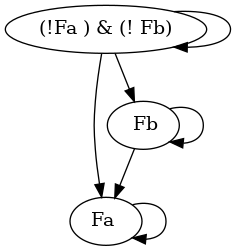

In [11]:
from IPython.display import Image
Image(filename=os.path.join(img_path, "model.png"))

Now, we translate the PrefScLTL formula to a Deterministic Finite-state Preference Automaton.

In [12]:
aut = formula.translate()

[INFO] Translating Fa  with options=('Buchi', 'Deterministic', 'High', 'Complete', 'Unambiguous', 'SBAcc').
[INFO] Translating  Fb with options=('Buchi', 'Deterministic', 'High', 'Complete', 'Unambiguous', 'SBAcc').


The \[INFO\] messages provide information about which ScLTL formulas (outcomes) were detected and translated to DFAs.

Next, we investigate the generated DFPA using standard functions.

In [13]:
print(f"{aut.states()=}")
print(f"{aut.atoms()=}")
print(f"{aut.init_state()=}")
print(f"{aut.delta((1, 1), {'a'})=}")
print(f"{aut.delta((1, 1), {'b'})=}")
print(f"{aut.delta((1, 1), {'a', 'b'})=}")
print(f"{aut.final((0, 0))=}")
print(f"{aut.final((0, 1))=}")
print(f"{aut.final((1, 0))=}")
print(f"{aut.final((1, 1))=}")

aut.states()=[(0, 0), (0, 1), (1, 0), (1, 1)]
aut.atoms()={'a', 'b'}
aut.init_state()=(1, 1)
aut.delta((1, 1), {'a'})=(0, 1)
aut.delta((1, 1), {'b'})=(1, 0)
aut.delta((1, 1), {'a', 'b'})=(0, 0)
aut.final((0, 0))=(0, 1, 0)
aut.final((0, 1))=(0, 1, 0)
aut.final((1, 0))=(0, 0, 1)
aut.final((1, 1))=(1, 0, 0)


**Note:** Currently, the order of DFAs in the product is not fixed. That is, in DFPA state `(0, 1)`, in one execution, `0` may correspond to `Fa` and `1` may correspond to `Fb`. Whereas, in another execution, the order may be flipped.

I'm working to fix this issue.

Now, we visualize the graphs. Remember, `aut` is an instance of `DFPA` class which inherits from `Automaton`. Hence, we will need to use `graphify` method first. Whereas, preference graph is an instance of `Graph` class. Hence, we can invoke its `to_png` function directly.

For the DFPA's underlying graph, each node is labeled with its state and edges are labeled with propositional logic formulas (just like spot).

For preference graph, each node is labeled as 2-tuple: (vector showing which maximal outcomes are satisfied, the DFPA states in that partition).

**Note:** Curently, we are unable to show the arrow for initial state.

In [14]:
aut_graph_ = aut.graphify()
aut_graph_.to_png(os.path.join(img_path, "aut_graph.png"), nlabel=["state"], elabel=["input"])

pref_graph_ = aut.pref_graph()
pref_graph_.to_png(os.path.join(img_path, "pref_graph.png"), nlabel=["state", "partition"])

Specialized unpointed graphify adding edges for automaton : 100% 16/16 [00:00<00:00, 1607.74it/s]


 [SUCCESS] <Graph with |V|=4, |E|=9> generated. 


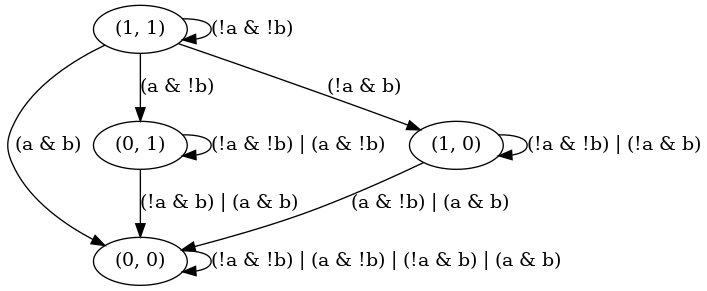

In [16]:
Image(filename=os.path.join(img_path, "aut_graph.png"))

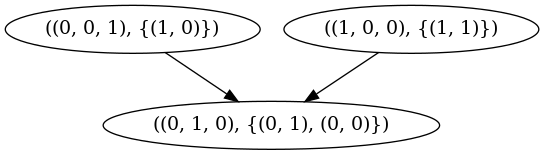

In [17]:
Image(filename=os.path.join(img_path, "pref_graph.png"))